In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Breast Cancer Dataset

In [2]:
X_raw = pd.read_csv('train.csv')

We loaded **train** dataset, now let's view our data and check which columns are useless

In [3]:
X_raw['diagnosis'].value_counts()

diagnosis
B    242
M    156
Name: count, dtype: int64

In [4]:
X_raw.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,2.983734e+07,14.183236,19.274171,92.345377,660.460553,0.096540,0.104395,0.090043,0.049586,0.181707,...,25.607663,107.907688,891.912563,0.132461,0.254167,0.276683,0.116187,0.291139,0.083802,NaN
std,1.278476e+08,3.548961,4.119494,24.438949,351.641745,0.014136,0.051625,0.080718,0.039031,0.027905,...,5.947946,33.937742,577.586383,0.021980,0.148297,0.209022,0.064881,0.060838,0.016672,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,...,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.666840e+05,11.717500,16.345000,75.467500,421.275000,0.086755,0.066712,0.030090,0.020710,0.161925,...,21.392500,84.430000,516.425000,0.117275,0.147325,0.117125,0.065600,0.252625,0.072310,NaN
50%,9.052360e+05,13.445000,18.895000,86.965000,556.950000,0.095825,0.094740,0.064905,0.033950,0.180050,...,25.300000,99.165000,700.650000,0.131350,0.217000,0.238900,0.105350,0.282800,0.079960,NaN
75%,8.810979e+06,16.115000,21.695000,106.525000,802.025000,0.106075,0.130500,0.132050,0.074112,0.196550,...,29.425000,127.100000,1143.500000,0.145900,0.342675,0.386400,0.166075,0.320600,0.092075,NaN
max,9.113205e+08,27.420000,33.810000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.200600,0.932700,1.252000,0.291000,0.577400,0.148600,NaN


All numerical culumns except _**Unnamed: 32**_ have some values, so ccan be used. _**Unnamed: 32**_ can be dropped, because it comntains only **NaN** values, and even not described in dataset instruction.

In [5]:
X_raw = X_raw.drop('Unnamed: 32', axis=1)
X_raw = X_raw.drop('id', axis=1)

In [6]:
X_raw.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [7]:
X_raw['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Now let's deal with _**diagnosis**_ column, it contains two unique values (**M** = malignant, **B** = benign). As such data have order, like *benign* less dangerous then *malignant* we can use `OrdinalEncoder`.

In [8]:
from sklearn.preprocessing import  OrdinalEncoder
enc = OrdinalEncoder()
X_raw['diagnosis_e'] = enc.fit_transform(X_raw[['diagnosis']])
X_raw[['diagnosis', 'diagnosis_e']].head()

,diagnosis,diagnosis_e
0,M,1.0
1,B,0.0
2,M,1.0
3,B,0.0
4,M,1.0


Now **B** -> `0` and **M** -> `1`

In [9]:
corr = X_raw.select_dtypes(include=['float64', 'int64']).corr().round(2)
px.imshow(corr, text_auto=True).show()


In [10]:
X_train = X_raw.drop(['diagnosis', 'diagnosis_e'], axis=1)
y_train = X_raw['diagnosis']

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
clf = RandomForestClassifier(max_depth=2, random_state=42)
cv_results = cross_validate(clf, X_train, y_train, cv=4)
cv_results


{'fit_time': array([0.27595496, 0.24116302, 0.23203278, 0.24242783]),
 'score_time': array([0.01571965, 0.01599693, 0.01651692, 0.01697683]),
 'test_score': array([0.94      , 0.89      , 0.93939394, 0.96969697])}

In [12]:
import sklearn
sklearn.tree.__all__
#print(sklearn.ensemble.AdaBoostClassifier.__doc__)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 'export_graphviz',
 'plot_tree',
 'export_text']

In [13]:
print(sklearn.ensemble.AdaBoostClassifier.__doc__)

An AdaBoost classifier.

    An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
    classifier on the original dataset and then fits additional copies of the
    classifier on the same dataset but where the weights of incorrectly
    classified instances are adjusted such that subsequent classifiers focus
    more on difficult cases.

    This class implements the algorithm based on [2]_.

    Read more in the :ref:`User Guide <adaboost>`.

    .. versionadded:: 0.14

    Parameters
    ----------
    estimator : object, default=None
        The base estimator from which the boosted ensemble is built.
        Support for sample weighting is required, as well as proper
        ``classes_`` and ``n_classes_`` attributes. If ``None``, then
        the base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`
        initialized with `max_depth=1`.

        .. versionadded:: 1.2
           `base_estimator` was renamed to `estimator`.

    n_estimators : int, def

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [ 30, 50, 70],
    'learning_rate': [  0.1, 0.05],
    'estimator__max_depth': [None,  2, 3]
   # 'base_estimator__min_samples_split': [2, 5, 10]
}
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
ada_clf = AdaBoostClassifier(estimator=tree_clf, n_estimators=50, learning_rate=0.5, random_state=42)
grid_search = GridSearchCV(ada_clf, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
#cv_results = cross_validate(ada_clf, X_train, y_train, cv=4)
#cv_results

Best Parameters: {'estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 70}
Best Score: 0.9548232323232324


In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
param_grid = {
    'n_estimators': [ 30, 50, 70],
    'learning_rate': [  0.1, 0.05],
    'estimator__max_depth': [None,  2, 3]
   # 'base_estimator__min_samples_split': [2, 5, 10]
}
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
ada_clf = AdaBoostClassifier(estimator=tree_clf, n_estimators=50, learning_rate=0.5, random_state=42)
grid_search = GridSearchCV(ada_clf, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

ValueError: Invalid parameter 'max_depth' for estimator AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.1, random_state=42). Valid parameters are: ['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [16]:
X_test_full = pd.read_csv('test.csv')
X_test = X_test_full.drop('Unnamed: 32', axis=1)
X_test = X_test.drop('id', axis=1)

In [17]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
submission = pd.DataFrame({
    'id': X_test_full['id'],
    'diagnosis': pred
})
submission.to_csv('submission.csv', index=False)

In [18]:
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_test)
submission = pd.DataFrame({
    'id': X_test_full['id'],
    'diagnosis': pred
})
submission.to_csv('ada_submission.csv', index=False)

In [19]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30, 50],
    'learning_rate': [  0.1, 0.05],
    'max_depth': [None,  2, 3, 5]
   # 'base_estimator__min_samples_split': [2, 5, 10]
}

gb_clf =  GradientBoostingClassifier(random_state=42)
grid_search2 = GridSearchCV(gb_clf, param_grid, cv=4, scoring='accuracy')
grid_search2.fit(X_train, y_train)
print("Best Parameters:", grid_search2.best_params_)
print("Best Score:", grid_search2.best_score_)
#cv_results = cross_validate(ada_clf, X_train, y_train, cv=4)
#cv_results

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 30}
Best Score: 0.9523232323232322


['M' 'B']
[0 1]


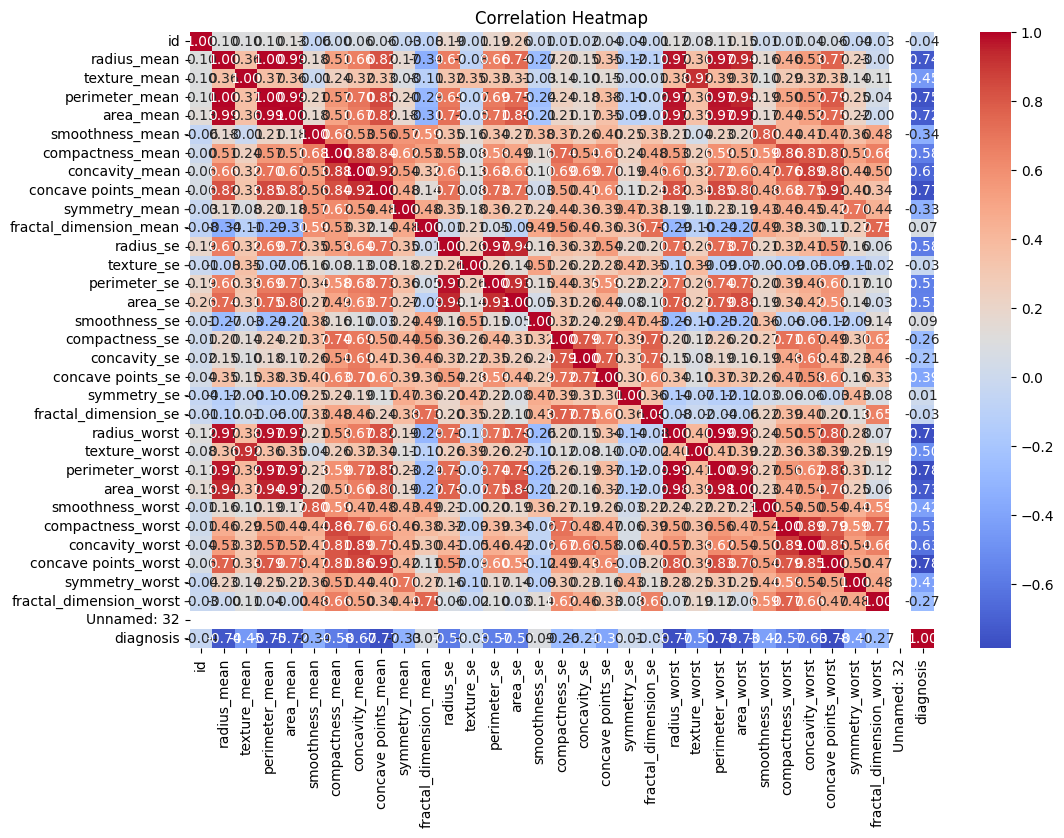

In [20]:
#!kaggle competitions submit -c breast-cancer-detection -f submission.csv -m "Message"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('g:\\CS231n\\Kaggle\\BreastCancer\\train.csv')

# Show dataset description
df.describe()

# Check unique values in the diagnosis column
print(df['diagnosis'].unique())
df2 = df.copy()
# Map 'M' to 0 and 'B' to 1
df2['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Verify the conversion
print(df2['diagnosis'].unique())

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()